# **Weather Data Analysis Tool**
## **Introduction**

**Weather Data Analyzer is a Python-based application designed to analyze and visualize weather data. Using Python's core concepts and data processing capabilities, the tool allows users to extract valuable information by processing weather data such as temperature, precipitation, and wind speed. It offers a versatile solution for understanding weather patterns with features such as data analysis, analytics, and ASCII-based visualization.**

**This project is great for teaching Python programming skills and the ability to work with real-world data. Whether you're analyzing past weather events, looking at forecasts for specific dates, or viewing data, this tool offers great functionality to users with the following features: Very high quality.**

## **Task-1**
## **Data Initialization**

● Use a CSV file containing weather data with fields like :
Date, Temperature (°C), Rainfall (mm), Humidity (%), Wind Speed
(km/h), Condition (Sunny, Rainy, etc.)

● Load and manipulate the data using Python core tools.

In [2]:
import pandas as pd
import csv
from datetime import datetime
DEFAULT_VALUES = {
    "Temperature":25.0,
    "Rainfall (mm)":0.0,
    "Humidity (%)":50.0,
    "Wind Speed (km/h)":10.0
}
# Validate Date
def validate_numeric(date_str):
  try:
    datetime.strptime(date_str,"%Y-%m-%d")
    return True
  except ValueError:
    return False
# Numeric value
def validate_numeric(value):
  try:
    return float(value)
  except ValueError:
    return None



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Task-2**
### **Importing and Validating Data**
● **Allow users to:**

  - Import new weather data into the application.

  - Validate the input to ensure correct formats for date and numerical fields.

● Handle missing or incomplete records:
○ Replace missing values with averages or predefined defaults.

In [3]:
# Handle missing or invalid
def handle_missing_data(row):
  for key in ["Temperature", "Rainfall (mm)", "Humidity (%)", "Wind Speed (km/h)"]:
    if row[key] == "" or not validate_numeric(row[key]):
      row[key]=DEFAULT_VALUES[key]
    else:
      row[key]= float(row[key])
      return row


In [4]:
# Func to imoport and validate data from csv
def import_weather_data(file_path):
  weather_data=[]
  # #with open("/content/drive/MyDrive/weatherData.csv", "r") as file :
  #   reader = csv.DictReader(file)
  #   for row in reader:
  #     if not validate_numeric(row["Date"]):
  #       print(f"Invalid date format: {row['Date']}. Skipping row.")
  #       continue
  #   row = handle_missing_data(row)
  #   file.close()
  row=pd.read_csv(file_path)
  for index, row in row.iterrows():
    if not validate_numeric(row["Date"]):
      print(f"Invalid date format: {row['Date']}. Skipping row.")
      continue
    row = handle_missing_data(row)
# Handle missing values

# Appending
    weather_data.append(row)
    return weather_data


In [5]:
if __name__=="__main__":
  file_path="/content/drive/MyDrive/weatherData.csv"
  data=import_weather_data(file_path)
  print("Cleaned Weather Data:")
  # for record in data:
  print(data)


# df_loaded = pd.read_csv("/content/drive/MyDrive/weatherData.csv")
# print("\nLoaded DataFrame:\n",df_loaded.sample(5))

Cleaned Weather Data:
None


# **Task-3**
### **Analyzing Weather Trends**
● **Calculate key statistics :**

- Average temperature, rainfall, and humidity over specific periods.

- Days with the highest and lowest temperature or rainfall.

- Count of sunny, rainy, or windy days in a given month.

In [6]:
from collections import Counter

# Function to calculate average of a field
def calculate_average(data, key):
    total = sum(row[key] for row in data)
    return total / len(data)

# Function to find the day with the highest or lowest value for a field
def find_extreme_day(data, key, extreme="highest"):
    if extreme == "highest":
        return max(data, key=lambda row: row[key])
    elif extreme == "lowest":
        return min(data, key=lambda row: row[key])

# Function to count weather conditions
def count_conditions(data, condition_key="Condition"):
    conditions = [row[condition_key] for row in data]
    return Counter(conditions)

# Function to analyze trends
def analyze_weather_trends(data, start_date=None, end_date=None):
    # Filter data for the date range if provided
    if start_date and end_date:
        data = [row for row in data if start_date <= row["Date"] <= end_date]

    # Calculate statistics
    avg_temp = calculate_average(data, "Temperature")
    avg_rainfall = calculate_average(data, "Rainfall")
    avg_humidity = calculate_average(data, "Humidity")

    # Find extreme days
    hottest_day = find_extreme_day(data, "Temperature", "highest")
    coldest_day = find_extreme_day(data, "Temperature", "lowest")
    rainiest_day = find_extreme_day(data, "Rainfall", "highest")

    # Count weather conditions
    condition_counts = count_conditions(data)

    # Display results
    print("Weather Trends Analysis:")
    print(f"Average Temperature: {avg_temp:.2f} °C")
    print(f"Average Rainfall: {avg_rainfall:.2f} mm")
    print(f"Average Humidity: {avg_humidity:.2f} %")
    print(f"Hottest Day: {hottest_day['Date']} ({hottest_day['Temperature']} °C)")
    print(f"Coldest Day: {coldest_day['Date']} ({coldest_day['Temperature']} °C)")
    print(f"Rainiest Day: {rainiest_day['Date']} ({rainiest_day['Rainfall']} mm)")
    print("Weather Conditions Count:")
    for condition, count in condition_counts.items():
        print(f"{condition}: {count} days")

# Example usage
if __name__ == "__main__":
    # Example dataset (replace with the cleaned dataset from Step 2)
    weather_data = [
        {"Date": "2025-01-01", "Temperature": 22.5, "Rainfall": 5.0, "Humidity": 60, "Wind Speed": 12, "Condition": "Sunny"},
        {"Date": "2025-01-02", "Temperature": 23.0, "Rainfall": 4.5, "Humidity": 58, "Wind Speed": 10, "Condition": "Rainy"},
        {"Date": "2025-01-03", "Temperature": 25.0, "Rainfall": 0.0, "Humidity": 55, "Wind Speed": 8, "Condition": "Windy"},
        {"Date": "2025-01-04", "Temperature": 20.0, "Rainfall": 12.0, "Humidity": 70, "Wind Speed": 15, "Condition": "Rainy"},
    ]

    analyze_weather_trends(weather_data)


Weather Trends Analysis:
Average Temperature: 22.62 °C
Average Rainfall: 5.38 mm
Average Humidity: 60.75 %
Hottest Day: 2025-01-03 (25.0 °C)
Coldest Day: 2025-01-04 (20.0 °C)
Rainiest Day: 2025-01-04 (12.0 mm)
Weather Conditions Count:
Sunny: 1 days
Rainy: 2 days
Windy: 1 days


# **Task-4**

## **Weather Reports**
**Generate summary reports for a user-specified date range:**

- Display the average, maximum, and minimum values for temperature, rainfall,
and wind speed.

- List days with extreme conditions, such as storms or heatwaves.

In [7]:
# Helper function to generate summary report
def generate_summary_report(data, start_date=None, end_date=None):
    # Filter data for the given date range
    if start_date and end_date:
        data = [row for row in data if start_date <= row["Date"] <= end_date]

    if not data:  # If no data exists for the date range
        print("No data available for the specified date range.")
        return

    # Calculate averages
    avg_temp = calculate_average(data, "Temperature")
    avg_rainfall = calculate_average(data, "Rainfall")
    avg_wind_speed = calculate_average(data, "Wind Speed")

    # Find extremes
    hottest_day = find_extreme_day(data, "Temperature", "highest")
    coldest_day = find_extreme_day(data, "Temperature", "lowest")
    rainiest_day = find_extreme_day(data, "Rainfall", "highest")
    windiest_day = find_extreme_day(data, "Wind Speed", "highest")

    # Display summary report
    print("\nWeather Summary Report:")
    print(f"Date Range: {start_date or 'Start'} to {end_date or 'End'}")
    print(f"Average Temperature: {avg_temp:.2f} °C")
    print(f"Average Rainfall: {avg_rainfall:.2f} mm")
    print(f"Average Wind Speed: {avg_wind_speed:.2f} km/h")
    print(f"Hottest Day: {hottest_day['Date']} ({hottest_day['Temperature']} °C)")
    print(f"Coldest Day: {coldest_day['Date']} ({coldest_day['Temperature']} °C)")
    print(f"Rainiest Day: {rainiest_day['Date']} ({rainiest_day['Rainfall']} mm)")
    print(f"Windiest Day: {windiest_day['Date']} ({windiest_day['Wind Speed']} km/h)")

    # List extreme conditions (e.g., storms, heatwaves)
    print("\nDays with Extreme Conditions:")
    for row in data:
        if row["Condition"].lower() in ["storm", "heatwave"]:
            print(f"{row['Date']}: {row['Condition']}")

# Example usage
if __name__ == "__main__":
    # Example dataset (replace with the cleaned dataset from Step 2)
    weather_data = [
        {"Date": "2025-01-01", "Temperature": 22.5, "Rainfall": 5.0, "Humidity": 60, "Wind Speed": 12, "Condition": "Sunny"},
        {"Date": "2025-01-02", "Temperature": 23.0, "Rainfall": 4.5, "Humidity": 58, "Wind Speed": 10, "Condition": "Rainy"},
        {"Date": "2025-01-03", "Temperature": 25.0, "Rainfall": 0.0, "Humidity": 55, "Wind Speed": 8, "Condition": "Windy"},
        {"Date": "2025-01-04", "Temperature": 20.0, "Rainfall": 12.0, "Humidity": 70, "Wind Speed": 15, "Condition": "Storm"},
    ]

    # User-specified date range
    start_date = "2025-01-01"
    end_date = "2025-01-03"

    generate_summary_report(weather_data, start_date, end_date)



Weather Summary Report:
Date Range: 2025-01-01 to 2025-01-03
Average Temperature: 23.50 °C
Average Rainfall: 3.17 mm
Average Wind Speed: 10.00 km/h
Hottest Day: 2025-01-03 (25.0 °C)
Coldest Day: 2025-01-01 (22.5 °C)
Rainiest Day: 2025-01-01 (5.0 mm)
Windiest Day: 2025-01-01 (12 km/h)

Days with Extreme Conditions:


# **Task-5**
## **Data Visualization**
● Visualize trends using ASCII charts:
- Line chart for temperature over time.
- Bar chart for daily rainfall in a month.

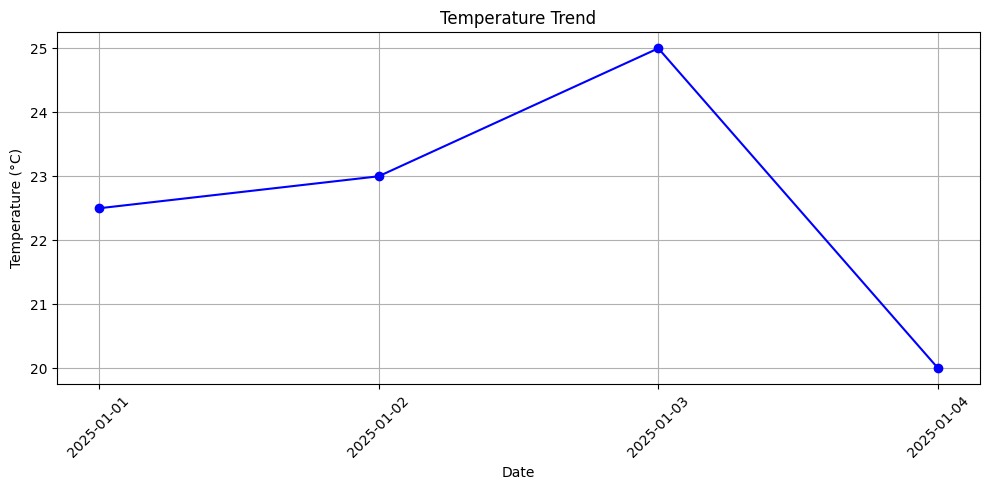

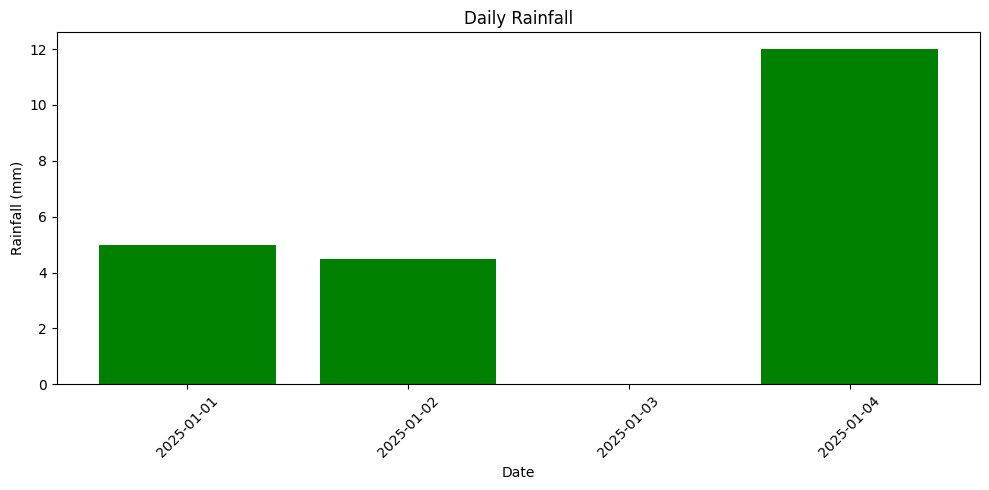


Weather Statistics by Month:
     Month  Avg_Temperature  Total_Rainfall  Avg_Wind_Speed
0  2025-01           22.625            21.5           11.25


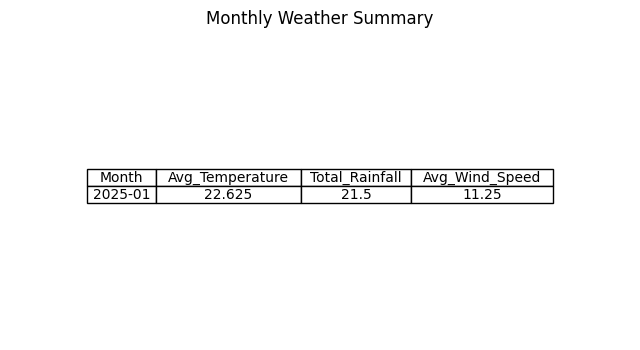

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot a temperature trend line chart
def plot_temperature_trend(data):
    dates = [row["Date"] for row in data]
    temperatures = [row["Temperature"] for row in data]

    plt.figure(figsize=(10, 5))
    plt.plot(dates, temperatures, marker="o", linestyle="-", color="blue")
    plt.title("Temperature Trend")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()

# Function to plot a daily rainfall bar chart
def plot_daily_rainfall(data):
    dates = [row["Date"] for row in data]
    rainfall = [row["Rainfall"] for row in data]

    plt.figure(figsize=(10, 5))
    plt.bar(dates, rainfall, color="green")
    plt.title("Daily Rainfall")
    plt.xlabel("Date")
    plt.ylabel("Rainfall (mm)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Function to create a summary table of weather statistics by month
def summarize_weather_by_month(data):
    # Convert data to a Pandas DataFrame
    df = pd.DataFrame(data)
    df["Date"] = pd.to_datetime(df["Date"])  # Ensure Date column is datetime
    df["Month"] = df["Date"].dt.to_period("M")  # Extract year-month as period

    # Group by Month and calculate statistics
    summary = df.groupby("Month").agg(
        Avg_Temperature=("Temperature", "mean"),
        Total_Rainfall=("Rainfall", "sum"),
        Avg_Wind_Speed=("Wind Speed", "mean"),
    ).reset_index()

    # Display the table
    print("\nWeather Statistics by Month:")
    print(summary)

    # Optional: Display the summary table as a plot
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.axis("tight")
    ax.axis("off")
    table = ax.table(
        cellText=summary.values,
        colLabels=summary.columns,
        cellLoc="center",
        loc="center",
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(summary.columns))))
    plt.title("Monthly Weather Summary")
    plt.show()

# Example usage
if __name__ == "__main__":
    # Example dataset (replace with the cleaned dataset from Step 2)
    weather_data = [
        {"Date": "2025-01-01", "Temperature": 22.5, "Rainfall": 5.0, "Humidity": 60, "Wind Speed": 12, "Condition": "Sunny"},
        {"Date": "2025-01-02", "Temperature": 23.0, "Rainfall": 4.5, "Humidity": 58, "Wind Speed": 10, "Condition": "Rainy"},
        {"Date": "2025-01-03", "Temperature": 25.0, "Rainfall": 0.0, "Humidity": 55, "Wind Speed": 8, "Condition": "Windy"},
        {"Date": "2025-01-04", "Temperature": 20.0, "Rainfall": 12.0, "Humidity": 70, "Wind Speed": 15, "Condition": "Storm"},
    ]

    # Plot temperature trend
    plot_temperature_trend(weather_data)

    # Plot daily rainfall
    plot_daily_rainfall(weather_data)

    # Summarize weather by month
    summarize_weather_by_month(weather_data)


# Temperature and Rainfall Data
### Temperature Trend
The above chart shows us some temperature trend of four consecutive days.
At first 3 days , temperature tends to increase and then suddenly in the fourth day it significantly dropped down.
Other dates will show some kind of trends like this one if we put them into our code.
### Rainfall Bar
At the very first day of January we observed around 4.5 mm rainfall. Rain continued for the next day. But then, in the  third day of January, there is no rain at all. 4th of January witnessed a significant amount of rainfall near 12 mm.
The bar shows us the amount of rainfall per day.
## Monthly Weather Summary
It also shows us the monthly weather data like, average temperature, total rainfall and average wind speed of the month of Jantuary.

-Average temperature was **22.625 Degree Celcius.**

-Total Rainfall was **21.5 mm**.

-And average windspeed was **11.25 km/h** respectively.

# **Task-6**
## **Advanced Features**
● **File Handling:**
- Allow exporting weather reports to a CSV file.
- Save and reload user-defined analysis configurations.

● **Error Handling:**
- Handle invalid data inputs and provide meaningful error messages.

● **Interactive Search:**
- Allow users to search for weather data by date or condition.

In [9]:
# File Handling: Exporting Reports
import csv

# Function to export summary report to a CSV file
def export_report_to_csv(data, file_name="weather_report.csv"):
    # Define the column headers
    headers = ["Date", "Temperature", "Rainfall (mm)", "Humidity (%)", "Wind Speed (km/h)", "Condition"]

    try:
        with open(file_name, mode="w", newline="") as file:
            writer = csv.DictWriter(file, fieldnames=headers)
            writer.writeheader()  # Write headers
            writer.writerows(data)  # Write data rows
        print(f"Report successfully exported to {file_name}.")
    except Exception as e:
        print(f"An error occurred while exporting the report: {e}")
# File Handling: Save and Reload Configurations
import json

# Function to save user-defined configurations
def save_config(config, file_name="config.json"):
    try:
        with open(file_name, "w") as file:
            json.dump(config, file)
        print(f"Configuration saved to {file_name}.")
    except Exception as e:
        print(f"An error occurred while saving the configuration: {e}")

# Function to load user-defined configurations
def load_config(file_name="config.json"):
    try:
        with open(file_name, "r") as file:
            config = json.load(file)
        print(f"Configuration loaded from {file_name}.")
        return config
    except FileNotFoundError:
        print(f"No configuration file found at {file_name}.")
        return {}
    except Exception as e:
        print(f"An error occurred while loading the configuration: {e}")
        return {}
#  Error Handling
# Function to handle invalid inputs
def get_valid_input(prompt, valid_options):
    while True:
        user_input = input(prompt)
        if user_input in valid_options:
            return user_input
        else:
            print(f"Invalid input. Please choose from: {', '.join(valid_options)}.")
#  Interactive Search
# Function to search weather data by date or condition
def search_weather_data(data, search_type="date", query=None):
    if search_type == "date":
        results = [row for row in data if row["Date"] == query]
    elif search_type == "condition":
        results = [row for row in data if row["Condition"].lower() == query.lower()]
    else:
        print("Invalid search type.")
        return []

    if results:
        print(f"\nSearch Results for {search_type} '{query}':")
        for result in results:
            print(result)
    else:
        print(f"No results found for {search_type} '{query}'.")
if __name__ == "__main__":
    # Example dataset (replace with the cleaned dataset from Step 2)
    weather_data = [
        {"Date": "2025-01-01", "Temperature": 22.5, "Rainfall (mm)": 5.0, "Humidity (%)": 60, "Wind Speed (km/h)": 12, "Condition": "Sunny"},
        {"Date": "2025-01-02", "Temperature": 23.0, "Rainfall (mm)": 4.5, "Humidity (%)": 58, "Wind Speed (km/h)": 10, "Condition": "Rainy"},
        {"Date": "2025-01-03", "Temperature": 25.0, "Rainfall (mm)": 0.0, "Humidity (%)": 55, "Wind Speed (km/h)": 8, "Condition": "Windy"},
        {"Date": "2025-01-04", "Temperature": 20.0, "Rainfall (mm)": 12.0, "Humidity (%)": 70, "Wind Speed (km/h)": 15, "Condition": "Storm"},
    ]

    # Export the weather data to a CSV file
    export_report_to_csv(weather_data)

    # Save a user-defined configuration
    user_config = {"analysis_type": "temperature_trend", "start_date": "2025-01-01", "end_date": "2025-01-04"}
    save_config(user_config)

    # Load the saved configuration
    loaded_config = load_config()

    # Search weather data by date
    search_weather_data(weather_data, search_type="date", query="2025-01-02")

    # Search weather data by condition
    search_weather_data(weather_data, search_type="condition", query="Rainy")


Report successfully exported to weather_report.csv.
Configuration saved to config.json.
Configuration loaded from config.json.

Search Results for date '2025-01-02':
{'Date': '2025-01-02', 'Temperature': 23.0, 'Rainfall (mm)': 4.5, 'Humidity (%)': 58, 'Wind Speed (km/h)': 10, 'Condition': 'Rainy'}

Search Results for condition 'Rainy':
{'Date': '2025-01-02', 'Temperature': 23.0, 'Rainfall (mm)': 4.5, 'Humidity (%)': 58, 'Wind Speed (km/h)': 10, 'Condition': 'Rainy'}


# **Task-7**
## User Interface
● Create an interactive, menu-driven program:
- Import or add weather data.
- View statistics for a specific date or date range.
- Generate ASCII-based visualizations.
- Export reports to files.

In [10]:

# Final step
import matplotlib.pyplot as plt
import pandas as pd
import csv
import json

# Functions from previous steps (reused and integrated)
def import_weather_data(file_path):
    weather_data = []
    try:
        with open(file_path, "r") as file:
            reader = csv.DictReader(file)
            for row in reader:
                row["Temperature"] = float(row["Temperature"])
                row["Rainfall (mm)"] = float(row["Rainfall (mm)"])
                row["Humidity (%)"] = float(row["Humidity (%)"])
                row["Wind Speed (km/h)"] = float(row["Wind Speed (km/h)"])
                weather_data.append(row)
        print("Data successfully imported.")
    except Exception as e:
        print(f"An error occurred while importing data: {e}")
    return weather_data

def plot_temperature_trend(data):
    dates = [row["Date"] for row in data]
    temperatures = [row["Temperature"] for row in data]
    plt.figure(figsize=(10, 5))
    plt.plot(dates, temperatures, marker="o", linestyle="-", color="blue")
    plt.title("Temperature Trend")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()

def plot_daily_rainfall(data):
    dates = [row["Date"] for row in data]
    rainfall = [row["Rainfall (mm)"] for row in data]
    plt.figure(figsize=(10, 5))
    plt.bar(dates, rainfall, color="green")
    plt.title("Daily Rainfall")
    plt.xlabel("Date")
    plt.ylabel("Rainfall (mm)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def summarize_weather_by_month(data):
    df = pd.DataFrame(data)
    df["Date"] = pd.to_datetime(df["Date"])
    df["Month"] = df["Date"].dt.to_period("M")
    summary = df.groupby("Month").agg(
        Avg_Temperature=("Temperature", "mean"),
        Total_Rainfall=("Rainfall (mm)", "sum"),
        Avg_Wind_Speed=("Wind Speed", "mean"),
    ).reset_index()
    print("\nWeather Statistics by Month:")
    print(summary)
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.axis("tight")
    ax.axis("off")
    table = ax.table(
        cellText=summary.values,
        colLabels=summary.columns,
        cellLoc="center",
        loc="center",
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(summary.columns))))
    plt.title("Monthly Weather Summary")
    plt.show()

def export_report_to_csv(data, file_name="weather_report.csv"):
    headers = ["Date", "Temperature (°C)", "Rainfall", "Humidity (%)", "Wind Speed (km/h)", "Condition"]
    try:
        with open(file_name, mode="w", newline="") as file:
            writer = csv.DictWriter(file, fieldnames=headers)
            writer.writeheader()
            writer.writerows(data)
        print(f"Report successfully exported to {file_name}.")
    except Exception as e:
        print(f"An error occurred while exporting the report: {e}")

def search_weather_data(data, search_type="date", query=None):
    if search_type == "date":
        results = [row for row in data if row["Date"] == query]
    elif search_type == "condition":
        results = [row for row in data if row["Condition"].lower() == query.lower()]
    else:
        print("Invalid search type.")
        return []
    if results:
        print(f"\nSearch Results for {search_type} '{query}':")
        for result in results:
            print(result)
    else:
        print(f"No results found for {search_type} '{query}'.")

# Menu-driven interface
def menu():
    weather_data = []
    while True:
        print("\nWeather Data Analysis Tool")
        print("1. Import Weather Data")
        print("2. View Temperature Trend")
        print("3. View Daily Rainfall Chart")
        print("4. Summarize Weather by Month")
        print("5. Export Weather Report to CSV")
        print("6. Search Weather Data")
        print("7. Exit")
        choice = input("Enter your choice (1-7): ")

        if choice == "1":
            file_path = input("Enter the path to the weather data CSV file: ")
            weather_data = import_weather_data(file_path)

        elif choice == "2":
            if weather_data:
                plot_temperature_trend(weather_data)
            else:
                print("No weather data available. Please import data first.")

        elif choice == "3":
            if weather_data:
                plot_daily_rainfall(weather_data)
            else:
                print("No weather data available. Please import data first.")

        elif choice == "4":
            if weather_data:
                summarize_weather_by_month(weather_data)
            else:
                print("No weather data available. Please import data first.")

        elif choice == "5":
            if weather_data:
                file_name = input("Enter the name of the CSV file to export (default: weather_report.csv): ")
                file_name = file_name.strip() or "weather_report.csv"
                export_report_to_csv(weather_data, file_name)
            else:
                print("No weather data available. Please import data first.")

        elif choice == "6":
            if weather_data:
                search_type = input("Search by 'date' or 'condition': ").strip().lower()
                if search_type == "date":
                    query = input("Enter the date (YYYY-MM-DD): ").strip()
                    search_weather_data(weather_data, search_type="date", query=query)
                elif search_type == "condition":
                    query = input("Enter the condition (e.g., Sunny, Rainy): ").strip()
                    search_weather_data(weather_data, search_type="condition", query=query)
                else:
                    print("Invalid search type.")
            else:
                print("No weather data available. Please import data first.")

        elif choice == "7":
            print("Exiting the Weather Data Analysis Tool. Goodbye!")
            break

        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    menu()



Weather Data Analysis Tool
1. Import Weather Data
2. View Temperature Trend
3. View Daily Rainfall Chart
4. Summarize Weather by Month
5. Export Weather Report to CSV
6. Search Weather Data
7. Exit
Enter your choice (1-7): 7
Exiting the Weather Data Analysis Tool. Goodbye!
